<a name='ex-03'></a>


$$ 予測値f_{\mathbf{w},b}(x) = \mathbf{w}\cdot \mathbf{x} + b

$$
$$
コスト関数J(\mathbf{w},b)はMSE/2
$$
　　　

$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} 
$$

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) 
$$



<>:17: SyntaxWarning: invalid escape sequence '\h'
<>:17: SyntaxWarning: invalid escape sequence '\h'
C:\Users\bsksh\AppData\Local\Temp\ipykernel_19796\3915402770.py:17: SyntaxWarning: invalid escape sequence '\h'
  data = pd.read_csv("data\houses.txt")


number of iterations completed: 134, number of weight updates: 13401.0
プログラムの実行時間: 0.0092 秒


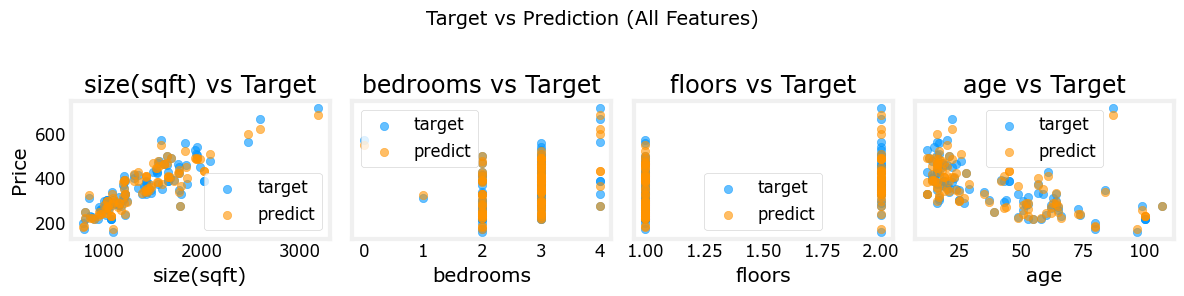

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
import pandas as pd
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

import time

# 実行前の時刻を取得
start_time = time.time()

#前処理
data = pd.read_csv("data\houses.txt")

X_train = data.iloc[:, :-1].values  # (n_samples, n_features)最後の列を除いた特徴量
y_train = data.iloc[:, -1].values   # （n_samples,）最後の列をターゲットとして
# 全ての列名を取得
all_columns = data.columns.tolist()
X_features = all_columns[:-1]
y_target = all_columns[-1]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train) #求めて(fit)正規化(taransform)

#モデルトレーニング
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
b_norm = sgdr.intercept_
w_norm = sgdr.coef_

#モデル予測
target= sgdr.predict(X_norm)


end_time = time.time()

execution_time = end_time - start_time
print(f"プログラムの実行時間: {execution_time:.4f} 秒")


n_rows, n_cols = 1, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3), sharey=True)
axes = np.array(axes).reshape(-1)  # 次元合わせ（1次元でも対応）

for i, ax in enumerate(axes):
    ax.scatter(X_train[:, i], y_train, label='target', alpha=0.6)
    ax.scatter(X_train[:, i], target, color=dlc["dlorange"], label='predict', alpha=0.6)

    # X軸ラベル設定
    ax.set_xlabel(X_features[i])
    
    # Y軸ラベルは一番左だけに表示（任意）
    if i == 0:
        ax.set_ylabel("Price")

    # subplotごとに凡例表示
    ax.legend()

    # subplotのタイトルに変数を含める例
    ax.set_title(f"{X_features[i]} vs Target")

# 全体タイトル
fig.suptitle("Target vs Prediction (All Features)", fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # タイトルが被らないよう調整
plt.show()

<p><strong>手動でプログラム</strong></p>


<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\bsksh\AppData\Local\Temp\ipykernel_18000\1446779571.py:3: SyntaxWarning: invalid escape sequence '\e'
  data = pd.read_csv("data\ex1data1.txt", header=None)


Iteration 0: Cost 31.5236, w=0.0459, b=0.0584
Iteration 150: Cost 5.8034, w=3.5861, b=4.5590
Iteration 300: Cost 4.5420, w=4.3700, b=5.5556
Iteration 450: Cost 4.4802, w=4.5437, b=5.7764
Iteration 600: Cost 4.4771, w=4.5821, b=5.8252
Iteration 750: Cost 4.4770, w=4.5906, b=5.8361
Iteration 900: Cost 4.4770, w=4.5925, b=5.8385
Iteration 1050: Cost 4.4770, w=4.5929, b=5.8390
Iteration 1200: Cost 4.4770, w=4.5930, b=5.8391
Iteration 1350: Cost 4.4770, w=4.5930, b=5.8391
プログラムの実行時間: 0.0488 秒


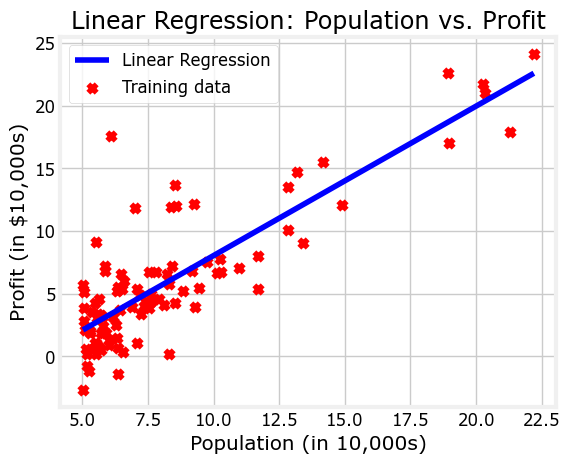

In [ ]:

start_time = time.time()

data = pd.read_csv("data\ex1data1.txt", header=None)

X_train = data.iloc[:, :-1].values.flatten()  #2D → 1D
y_train = data.iloc[:, -1].values 

# 特徴量の標準化（推奨）
X_mean = np.mean(X_train)
X_std = np.std(X_train)
X_norm = (X_train - X_mean) / X_std

# ハイパーパラメータの設定
alpha = 0.01       # 学習率
iterations = 1500  # 繰り返し回数

# パラメータの初期化
w = 0.0
b = 0.0
m = len(X_norm)  # データ数

# コスト計算関数
def compute_cost(X, y, w, b):
    predictions = w * X + b
    cost = (1 / (2 * len(X))) * np.sum((predictions - y) ** 2)
    return cost

# 勾配計算関数
def compute_gradient(X, y, w, b):
    m = len(X)
    predictions = w * X + b
    errors = predictions - y
    dj_dw = (1 / m) * np.sum(errors * X)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

# 勾配降下法
for i in range(iterations):
    dj_dw, dj_db = compute_gradient(X_norm, y_train, w, b)
    w -= alpha * dj_dw
    b -= alpha * dj_db
    
    # 10回に1回コスト出力
    if i % (iterations // 10) == 0:
        cost = compute_cost(X_norm, y_train, w, b)
        print(f"Iteration {i}: Cost {cost:.4f}, w={w:.4f}, b={b:.4f}")

# 回帰直線の描画
x_range = np.linspace(min(X_norm), max(X_norm), 100)
y_pred = w * x_range + b

end_time = time.time()

execution_time = end_time - start_time
print(f"プログラムの実行時間: {execution_time:.4f} 秒")

plt.plot(x_range * X_std + X_mean, y_pred, label="Linear Regression", color='blue')  # 元のスケールに戻す

# 元のデータ描画
plt.scatter(X_train, y_train, color='red', marker='x', label="Training data")
plt.title("Linear Regression: Population vs. Profit")
plt.xlabel("Population (in 10,000s)")
plt.ylabel("Profit (in $10,000s)")
plt.legend()
plt.grid(True)
plt.show()

